In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [46]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [39]:
data.isnull().sum().sum()

0

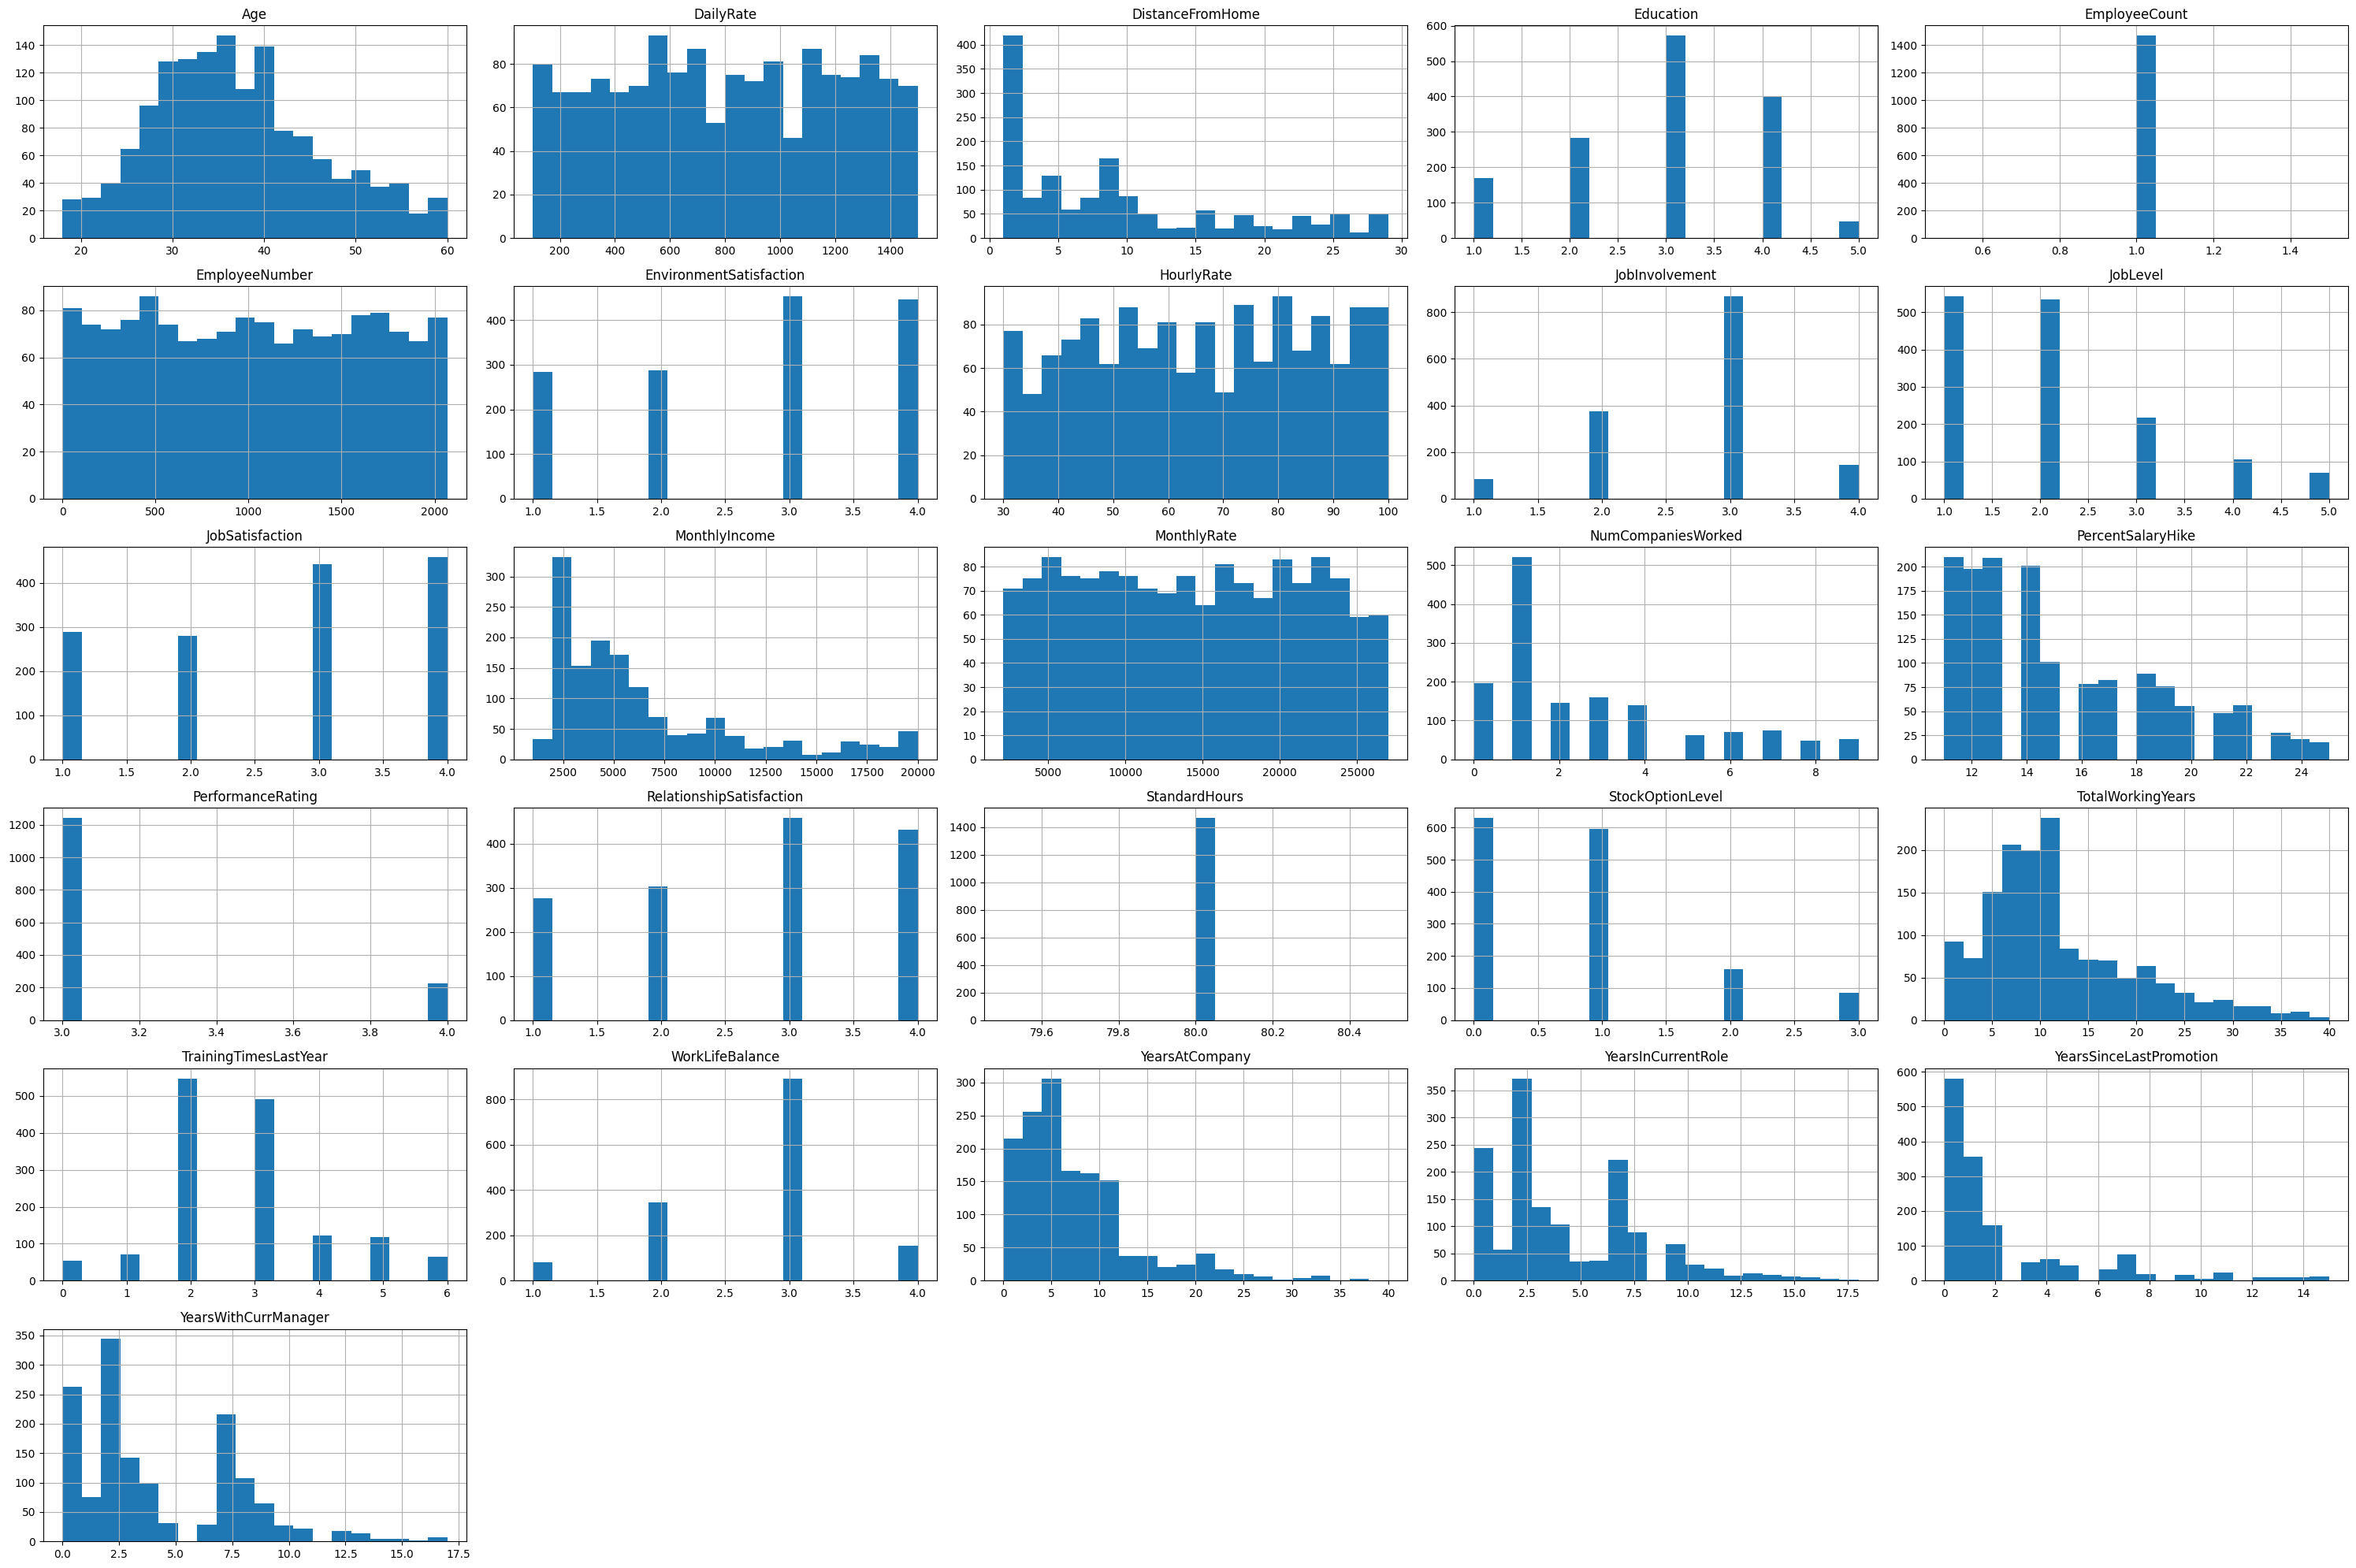

In [40]:
data.hist(figsize=(30,20), bins = 20)
plt.tight_layout()

In [41]:
for col in data.columns:
  if len(data[col].unique()) == 1470:
    print(col)

EmployeeNumber


It seems that we can drop the two features that have one unique value along all the data set which are: EmployeeCount and StandardHours and also EmployeeNumber as it has distinct values for each row


In [43]:
data.drop(['EmployeeNumber', 'EmployeeCount','StandardHours'], axis = 1, inplace=True)

In [48]:
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

0    1233
1     237
Name: Attrition, dtype: int64

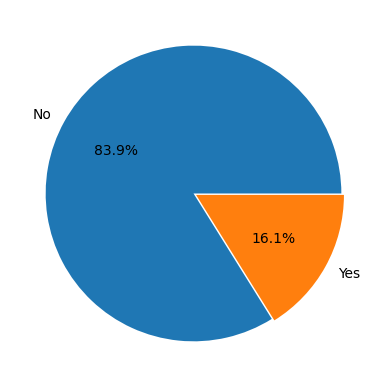

In [ ]:
pie = data.Attrition.value_counts()
plt.pie(pie,labels=['No','Yes'],explode=[0.01,0.01] ,autopct='%1.1f%%')
plt.show()

C:\Users\21268\AppData\Local\Temp\ipykernel_25616\585942754.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


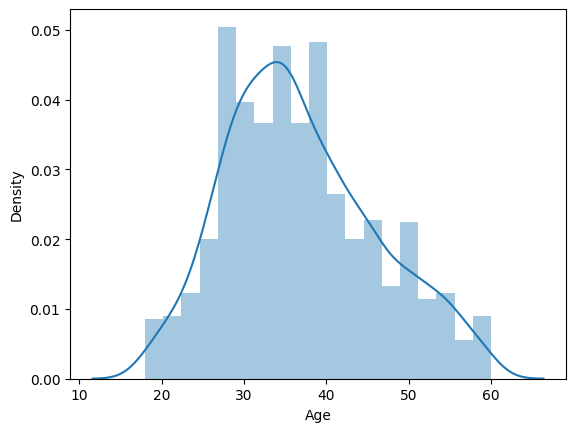

In [66]:
sns.distplot(data['Age'])
plt.show()

In [72]:
data['Age'].value_counts().sort_values(ascending=False).head()

35    78
34    77
36    69
31    69
29    68
Name: Age, dtype: int64

In [73]:
corr = data.corr()

C:\Users\21268\AppData\Local\Temp\ipykernel_25616\1351907255.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


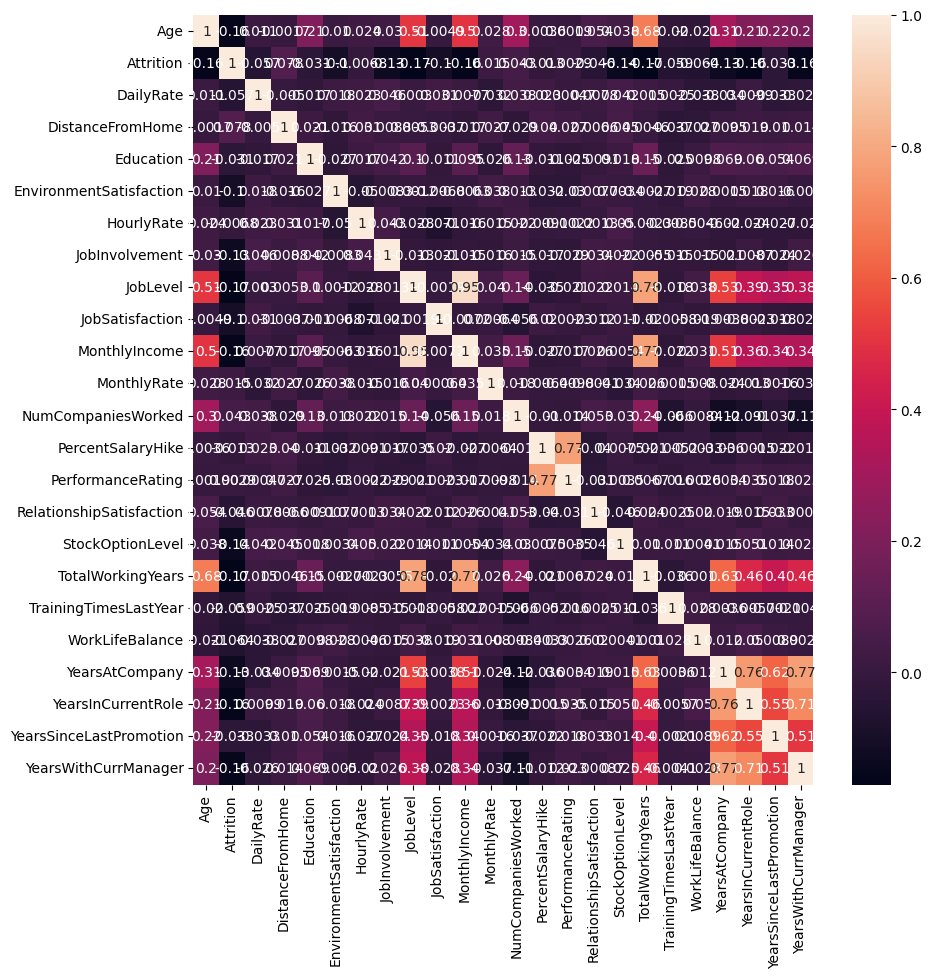

In [78]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.show()

As we can see, there isn't a very strong correlation of the target column with any of the numerical columns. But we can see other correlations such as;

* More senior employees have higher total working years (very obvious)
* Higher performance ratings lead to salary hike percentage to increase
* The more years an employee puts in, the more their monthly income increases
* A lot of employees remain in their current role and also under the same manager as years pass by meaning they don't get promotion and this could be a major factor contributing to attrition

<Axes: >

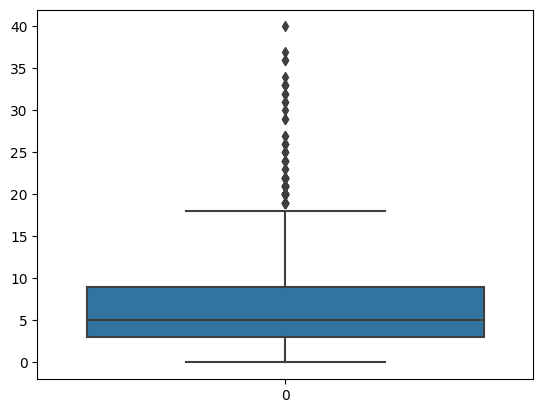

In [79]:
sns.boxplot(data['YearsAtCompany'])

Most employees remain in the company for 3-9 years with median being 5 years.


<Axes: xlabel='BusinessTravel', ylabel='count'>

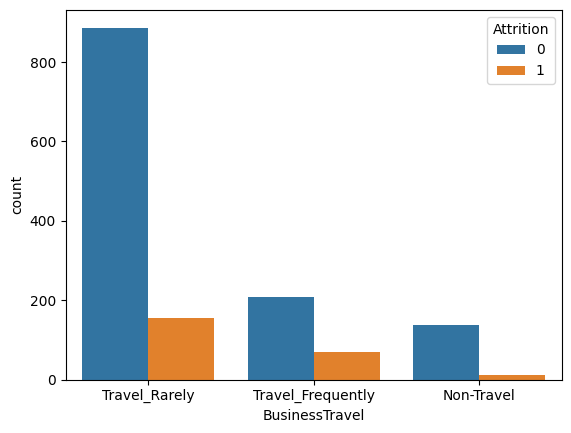

In [81]:
sns.countplot(x = 'BusinessTravel', hue='Attrition', data=data)

Most employees who travel rarely don't leave the company. From the plot we can tell, sending employees on business travels or not doesn't really make much of a difference and doesn't have a significant effect on attrition.

<Axes: xlabel='Department', ylabel='count'>

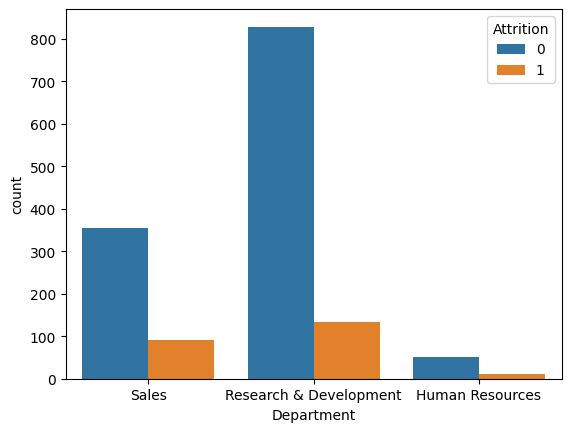

In [84]:
sns.countplot(x='Department', hue='Attrition', data=data)

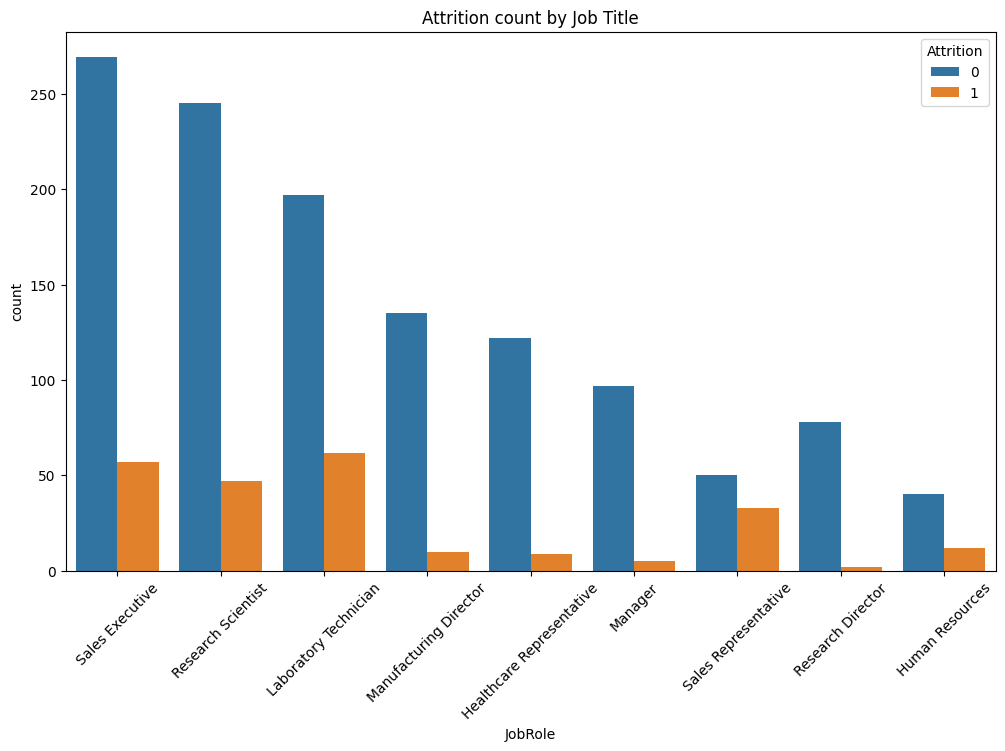

In [92]:
plt.figure(figsize=(12,7))
sns.countplot(x='JobRole', hue='Attrition', data=data)
plt.xticks(rotation=45)
plt.title('Attrition count by Job Title')
plt.show()

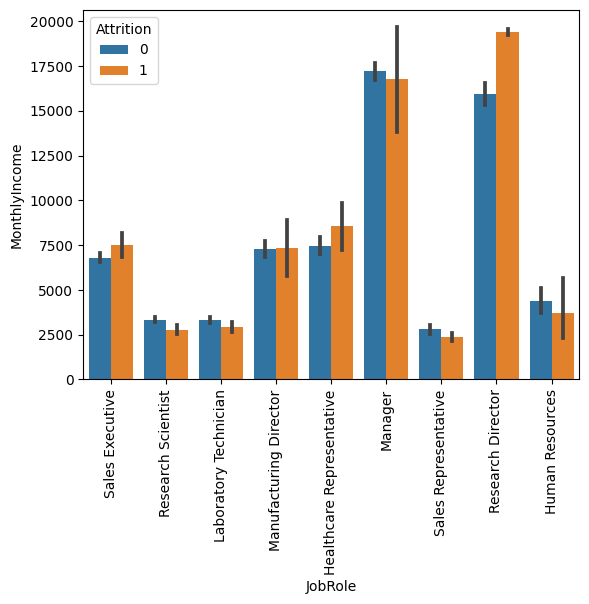

In [99]:
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=data)
plt.xticks(rotation=90)
plt.show()

As doubted, laboratory technicians, research scientists and sales representatives and executives have very low salary and this could be a major factor behind attritions.

Also, as we had seen earlier, the HR department had the most attritions and we can see they have very low salaries as well so once again, this is something to think about.

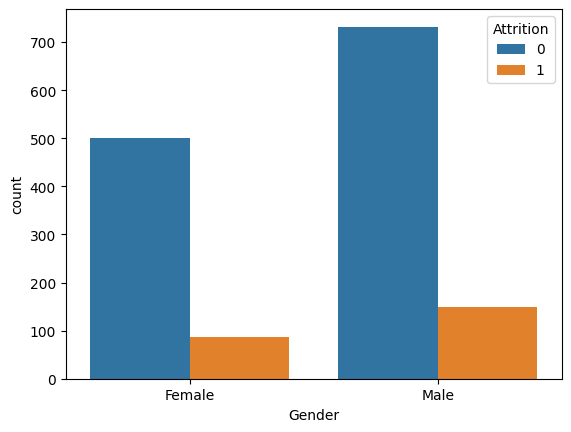

In [94]:
sns.countplot(x='Gender', hue='Attrition', data=data)
plt.show()

In [111]:
data.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrent

In [ ]:
from sklearn .preprocessing import LabelEncoder
data['Department'] = LabelEncoder().fit_transform(data['Department'])
data['BusinessTravel'] = LabelEncoder().fit_transform(data['BusinessTravel'])
data['EducationField'] = LabelEncoder().fit_transform(data['EducationField'])
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data['OverTime'] = LabelEncoder().fit_transform(data['OverTime'])
data['Over18'] = LabelEncoder().fit_transform(data['Over18'])
data['JobRole'] = LabelEncoder().fit_transform(data['JobRole'])
data['MaritalStatus'] = LabelEncoder().fit_transform(data['MaritalStatus'])

In [136]:
from sklearn.model_selection import train_test_split

X,y = data.drop('Attrition', axis=1), data['Attrition']
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [138]:
from sklearn.tree import DecisionTreeClassifier
tree  = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [139]:
from sklearn.metrics import accuracy_score
y_predict = tree.predict(x_test,)
acc = accuracy_score(y_test, y_predict)
acc

0.7789115646258503

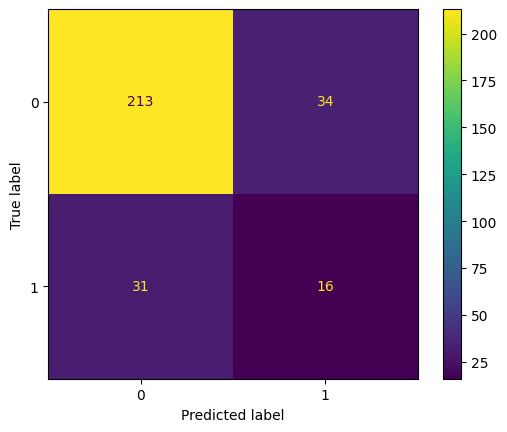

In [140]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

res = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(res, display_labels=tree.classes_ )
disp.plot()
plt.show()

In [141]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
acc2 = accuracy_score(y_test, y_pred)
acc2

c:\Users\21268\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8469387755102041

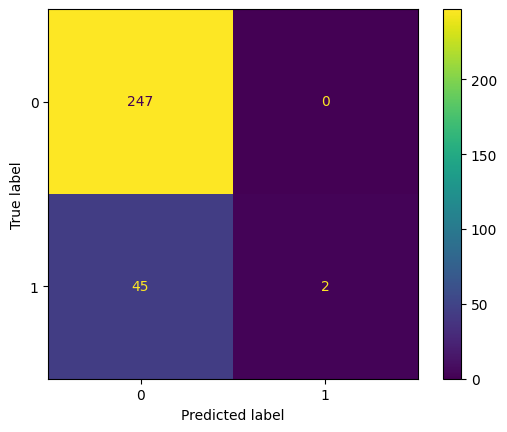

In [142]:
res = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(res, display_labels=lr.classes_ )
disp.plot()
plt.show()

In [143]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc3 = accuracy_score(y_test, y_pred)
acc3

0.8435374149659864

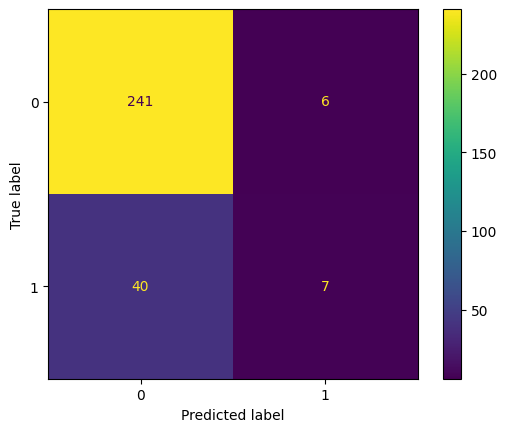

In [144]:
res = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(res, display_labels=lr.classes_ )
disp.plot()
plt.show()

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    n_estimators=100,        # Number of trees
    learning_rate=0.1,       # Learning rate
    max_depth=5,             # Maximum depth of each tree
    subsample=0.8,           # Subsample ratio of the training instances
    colsample_bytree=0.8,    # Subsample ratio of columns when constructing each tree
    random_state=42
)

# Train the model
xgb_clf.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [147]:
y_pred = xgb_clf.predict(x_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


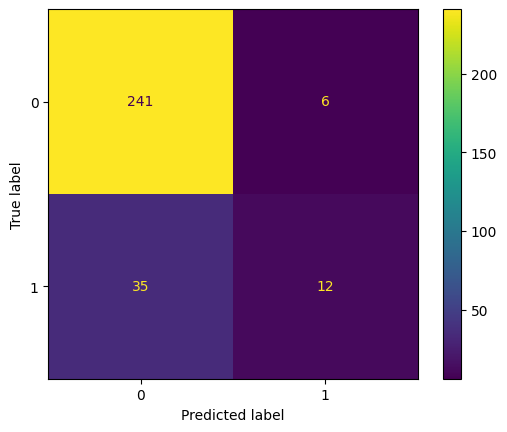

In [148]:
res = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(res, display_labels=lr.classes_ )
disp.plot()
plt.show()

In [149]:
import joblib
joblib.dump(xgb_clf, 'xgb_clf.pkl')

['xgb_clf.pkl']